In [ ]:
# !pip install kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Решить задачу регрессии
* Сравнить результаты численного решения с аналитическим

$$ y(x) = x0*w0 + x1*w1 $$

In [ ]:
# результат работы модели -- это скалярное произведение весов w на значения признаков x
def linear_prediction(X, w):

    #return X.dot(w)
    return X * w

In [ ]:
def loss(X,y,w):
  y_n = linear_prediction(X, w)
  L = sum((y_n - y) ** 2) / len(y)
  #print((y_n - y) ** 2)
  return L

In [ ]:
#необходимо реализовать численную оптимизацию функции стоиомости (градиентный спуск)
#на вход подается матрица признаков Х, целевая переменная y, веса и скорость обучения lr (параметр альфа)
#функция стоимости -- MSE
def optim(x,w,y,lr=0.001):
    #print([linear_prediction(x, w) - y])
    #print(sum([x * w - y][0]) / len(x))
    w_n = w + 1
    while abs(w_n - w) > 0.001:
      d_l = sum(x * (linear_prediction(x, w) - y)) * 2 / len(x)
      w_n = w
      w = w - lr * d_l
    return w

In [ ]:
x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,
    6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894,
    9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,
    11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,
    7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292, 5.1884,
    6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
y = [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,
     3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692, 24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,
     4.1164, 3.3928, 10.117, 5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981,
     1.4233, -1.4211, 2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,
     1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,
     1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705]

In [ ]:
x = np.array(x)
y = np.array(y)

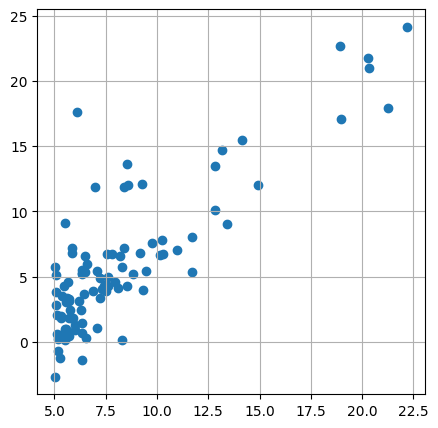

In [ ]:
plt.figure(figsize=(5,5))
plt.grid()
plt.scatter(x,y)

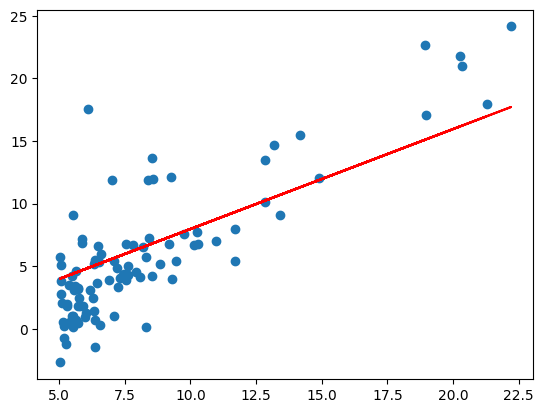

[11.71926885]


In [ ]:
w = np.random.rand(1)
w_1 = optim(x, w, y)
y_1 = linear_prediction(x, w_1)
plt.scatter(x, y)
plt.plot(x, y_1, color='red')
plt.show()
print(loss(x, y, w_1))

[11.71731181]


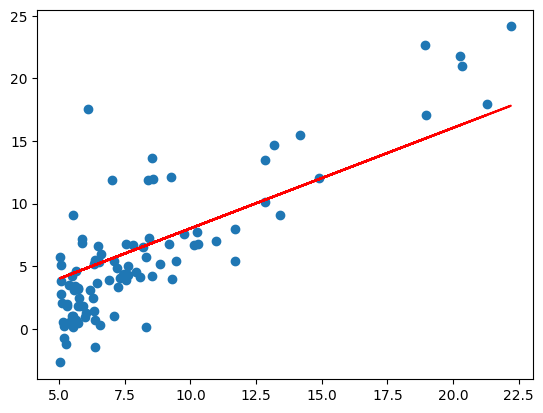

In [ ]:
#найдем аналитическое решение
x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,
    6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894,
    9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,
    11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908, 18.959,
    7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345, 6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292, 5.1884,
    6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
y = [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,
     3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467, 14.692, 24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,
     4.1164, 3.3928, 10.117, 5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844, 8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981,
     1.4233, -1.4211, 2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,
     1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576, 0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,
     1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705]


x = np.array([x]).transpose()
y = np.array([y]).transpose()
W = np.dot(x.transpose(), x)
W = np.linalg.inv(W)
W = np.dot(W, x.transpose())
W = np.dot(W[0], y)
plt.scatter(x, y)
plt.plot(x, x * W, color='red')
print(loss(x, y, W))

# Решить задачу регрессии для прогнозирования ...
Использовать линейную регрессию без регуляризации, с регуляризацией Тихонова, и лассо регуляризацией, сравнить результаты

Данные можно скачать двумя способами:

* Скачать данные с Kaggle, в Google Colab нажать слева значок папки и перетащить данные туда
* С помощью Kaggle API

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kgulina","key":"5102d54b697e7f079d383df9de226950"}'}

In [ ]:
!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle #копия этого файла в эту папку
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download 'shivam2503/diamonds'

diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip diamonds.zip

Archive:  diamonds.zip
replace diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv("diamonds.csv")
print(data.shape)
data.head()

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#выделим категориальные признаки и числовые
#метод select_dtypes возвращает подмножество столбцов фрейма данных на основе dtypes столбцов
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

3


['cut', 'color', 'clarity']

In [ ]:
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

7


['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
#посмотрим, какое количество уникальных значений имеют категориальные признаки и числовые
unic_categ = pd.DataFrame([[i,data[i].nunique()] for i in categorical_cols], columns=['column_name','num_unique']).sort_values(by=['num_unique'])
unic_categ

,column_name,num_unique
0,cut,5
1,color,7
2,clarity,8


In [ ]:
# здесь можно исследовать количество значений по числовым признакам

In [ ]:
target_name = 'price'
numeric_cols.remove('price')

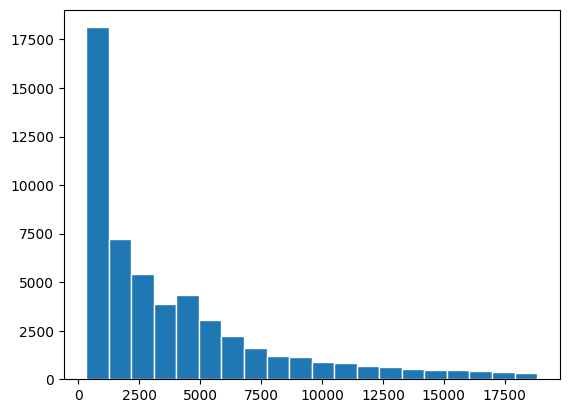

In [ ]:
#визуализация

plt.hist(data[target_name], bins = 20, edgecolor='white')
plt.show()


fig = px.box(data_frame=data, y=target_name, width=700)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(target_name, axis=1),
    data[target_name],
    test_size=0.3,
    random_state=1,
    shuffle=True
)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(37758, 9)
(37758,)

(16182, 9)
(16182,)


In [ ]:
#сделаем одну выборку с нормализованными численными признаками
from sklearn.preprocessing import StandardScaler

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [ ]:
X_train_num

,carat,depth,table,x,y,z
30083,0.32,61.5,56.0,4.42,4.40,2.71
21864,1.54,62.8,58.0,7.35,7.32,4.61
3761,0.71,62.1,56.0,5.69,5.75,3.55
21262,1.03,62.0,56.0,6.48,6.45,4.01
15460,1.33,62.4,55.0,7.02,7.05,4.39
...,...,...,...,...,...,...
50057,0.70,62.8,59.0,5.56,5.61,3.51
32511,0.40,63.9,57.0,4.71,4.65,2.99
5192,0.91,62.7,63.0,6.05,6.00,3.78
12172,1.18,61.7,56.0,6.79,6.82,4.20


In [ ]:
X_train_num_scaled

array([[-1.0011366 , -0.16879775, -0.65177807, -1.16032405, -1.1492145 ,
        -1.15932439],
       [ 1.5529171 ,  0.73833791,  0.24415295,  1.43589605,  1.36704495,
         1.50192583],
       [-0.18467681,  0.24988025, -0.65177807, -0.03499998,  0.01412463,
         0.01722834],
       ...,
       [ 0.23402051,  0.66855824,  2.48398049,  0.28398952,  0.2295578 ,
         0.33937968],
       [ 0.79926191, -0.02923842, -0.65177807,  0.93969016,  0.93617861,
         0.92765605],
       [-1.0011366 , -0.58747574, -0.65177807, -1.16918487, -1.12336252,
        -1.18733755]])

In [ ]:
# Кодирование категориальных признаков
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = encoder.fit_transform(X_train[categorical_cols]).astype(int)
X_test_cat = encoder.fit_transform(X_test[categorical_cols]).astype(int)

In [ ]:
X_train_cat.shape, X_train_cat

((37758, 3),
 array([[2, 5, 7],
        [3, 2, 2],
        [2, 2, 4],
        ...,
        [4, 3, 5],
        [2, 6, 4],
        [2, 1, 6]]))

In [ ]:
#объеденим в один набор численные и категориальные признаки
X_train_new = np.hstack((X_train_num_scaled, X_train_cat))
X_test_new = np.hstack((X_test_num_scaled, X_test_cat))
X_train_new.shape, X_test_new.shape

((37758, 9), (16182, 9))

In [ ]:
np.random.seed(1)
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train_new, y_train)

LinearRegression()

In [ ]:
pred_lr = model_lr.predict(X_test_new) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr)
r2 = r2_score(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
print("Средняя ошибка прогноза цены:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены: 853.7910819184328
MSE = 1720839.537; R2 = 0.8878


In [ ]:
np.random.seed(1)
model_lasso = Lasso()

In [ ]:
model_lasso.fit(X_train_new, y_train)

Lasso()

In [ ]:
pred_lr_lasso = model_lasso.predict(X_test_new) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr_lasso)
r2 = r2_score(y_test, pred_lr_lasso)
mae = mean_absolute_error(y_test, pred_lr_lasso)
print("Средняя ошибка прогноза цены:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены: 855.0151672911527
MSE = 1722491.374; R2 = 0.8877


In [ ]:
np.random.seed(1)
model_ridge = Ridge()

In [ ]:
model_ridge.fit(X_train_new, y_train)

Ridge()

In [ ]:
pred_lr_ridge = model_ridge.predict(X_test_new) # получение предсказаний на тестовой выборке
mse = mean_squared_error(y_test, pred_lr_ridge)
r2 = r2_score(y_test, pred_lr_ridge)
mae = mean_absolute_error(y_test, pred_lr_ridge)
print("Средняя ошибка прогноза цены:", mae)
print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 4)))

Средняя ошибка прогноза цены: 853.909790807995
MSE = 1720965.777; R2 = 0.8878


[]

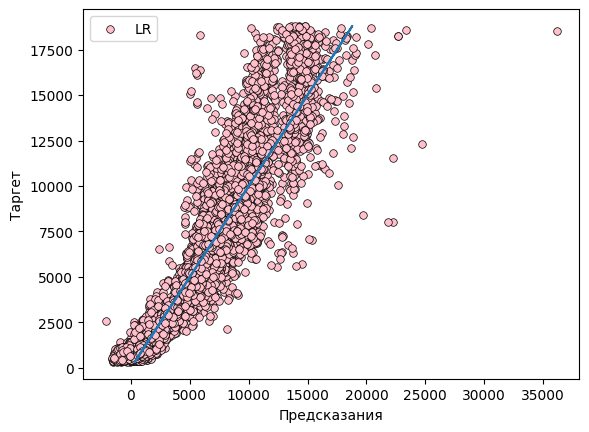

In [ ]:
plt.plot(y_test,y_test)
plt.scatter(pred_lr,y_test, color = 'pink', label = 'LR',s=30,edgecolor='black', linewidths=0.5)
#plt.scatter(pred_lr_lasso,y_test, color = 'crimson', label = 'Lasso',s=30,edgecolor='black', linewidths=0.5)
#plt.scatter(pred_lr_ridge,y_test, color = 'c', label = 'Ridge',s=30,edgecolor='black', linewidths=0.5)
plt.xlabel('Предсказания')
plt.ylabel('Таргет')
plt.legend()
plt.plot()